### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("scraped cars24 data (1).csv")
cars

,Name,Transmission,KM_Driven,Fuel_Type,Owner,Registration,EMI,Sales,Year,Types,City
0,2020 Maruti New Wagon-R LXI CNG 1.0 L,MANUAL,"20,724 km",Petrol + CNG,1st Owner,DL-1C,"?11,626/month","Fixed Price?5,94,699",20-Sep,CNG,New Delhi
1,2017 Maruti Celerio ZXI OPT AMT,AUTOMATIC,"87,848 km",Petrol,1st Owner,TS-08-x-xxxx,"?8,893/month","?4,65,799?4,54,899",17-Jan,Maruti,Hyderabad
2,2010 Hyundai i10 ERA 1.1 IRDE,MANUAL,"60,476 km",Petrol,2nd Owner,KL-40,"?3,775/month","?2,29,099?1,93,099",10-Aug,NaN,Kochi
3,2013 Maruti Alto 800 LXI,MANUAL,"40,700 km",Petrol,1st Owner,TN-12-x-xxxx,"?5,019/month","Fixed Price?2,56,699",13-Jul,Cars from 2 lakh - 5 lakh,Chennai
4,2021 Mahindra XUV 3OO W8 (O) AT,NaN,"4,022 km",Petrol,1st Owner,MH-12,"?22,781/month","Fixed Price?12,13,099",21-Dec,Mahindra,Pune
...,...,...,...,...,...,...,...,...,...,...,...
2040,2021 Renault Duster RXZ CVT 1.3 TURBO,AUTOMATIC,"10,821 km",Petrol,1st Owner,DL-7C,"?27,010/month","?15,48,199?14,38,299",21-Oct,Renault,New Delhi
2041,2022 KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,NaN,"1,114 km",Petrol,1st Owner,KA-01-x-xxxx,"?39,614/month","?22,34,399?21,09,499",22-Feb,Cars above 10 lakh,Bangalore
2042,2020 Volkswagen Polo HIGH LINE PLUS 1.0,MANUAL,"17,595 km",Petrol,1st Owner,MH-14,"?15,337/month","Fixed Price?7,84,519",20-Feb,Petrol,Pune
2043,2020 Renault TRIBER 1.0 RXZ,MANUAL,"33,419 km",Petrol,1st Owner,TS-08-x-xxxx,"?12,563/month","?6,47,599?6,42,599",20-Jan,Renault,Hyderabad


#### Data set conains so many special characters so we have to perform split and join function to get a proper dataset:

In [3]:
cars_split_1 = cars['EMI'].str.split("?" , expand = True)
cars_split_1

,0,1
0,,"11,626/month"
1,,"8,893/month"
2,,"3,775/month"
3,,"5,019/month"
4,,"22,781/month"
...,...,...
2040,,"27,010/month"
2041,,"39,614/month"
2042,,"15,337/month"
2043,,"12,563/month"


In [4]:
cars_0 = cars_split_1.drop([0], axis = 1)
cars_0.rename({1:"EMI"}, axis = 1, inplace = True)
cars_0

,EMI
0,"11,626/month"
1,"8,893/month"
2,"3,775/month"
3,"5,019/month"
4,"22,781/month"
...,...
2040,"27,010/month"
2041,"39,614/month"
2042,"15,337/month"
2043,"12,563/month"


In [5]:
cars_split_2 = cars['Sales'].str.split("?" , expand = True)
cars_split_2

,0,1,2
0,Fixed Price,"5,94,699",None
1,,"4,65,799","4,54,899"
2,,"2,29,099","1,93,099"
3,Fixed Price,"2,56,699",None
4,Fixed Price,"12,13,099",None
...,...,...,...
2040,,"15,48,199","14,38,299"
2041,,"22,34,399","21,09,499"
2042,Fixed Price,"7,84,519",None
2043,,"6,47,599","6,42,599"


In [6]:
cars_1 = pd.concat((cars ,cars_split_2 ), axis = 1)
cars_1

,Name,Transmission,KM_Driven,Fuel_Type,Owner,Registration,EMI,Sales,Year,Types,City,0,1,2
0,2020 Maruti New Wagon-R LXI CNG 1.0 L,MANUAL,"20,724 km",Petrol + CNG,1st Owner,DL-1C,"?11,626/month","Fixed Price?5,94,699",20-Sep,CNG,New Delhi,Fixed Price,"5,94,699",None
1,2017 Maruti Celerio ZXI OPT AMT,AUTOMATIC,"87,848 km",Petrol,1st Owner,TS-08-x-xxxx,"?8,893/month","?4,65,799?4,54,899",17-Jan,Maruti,Hyderabad,,"4,65,799","4,54,899"
2,2010 Hyundai i10 ERA 1.1 IRDE,MANUAL,"60,476 km",Petrol,2nd Owner,KL-40,"?3,775/month","?2,29,099?1,93,099",10-Aug,NaN,Kochi,,"2,29,099","1,93,099"
3,2013 Maruti Alto 800 LXI,MANUAL,"40,700 km",Petrol,1st Owner,TN-12-x-xxxx,"?5,019/month","Fixed Price?2,56,699",13-Jul,Cars from 2 lakh - 5 lakh,Chennai,Fixed Price,"2,56,699",None
4,2021 Mahindra XUV 3OO W8 (O) AT,NaN,"4,022 km",Petrol,1st Owner,MH-12,"?22,781/month","Fixed Price?12,13,099",21-Dec,Mahindra,Pune,Fixed Price,"12,13,099",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,2021 Renault Duster RXZ CVT 1.3 TURBO,AUTOMATIC,"10,821 km",Petrol,1st Owner,DL-7C,"?27,010/month","?15,48,199?14,38,299",21-Oct,Renault,New Delhi,,"15,48,199","14,38,299"
2041,2022 KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,NaN,"1,114 km",Petrol,1st Owner,KA-01-x-xxxx,"?39,614/month","?22,34,399?21,09,499",22-Feb,Cars above 10 lakh,Bangalore,,"22,34,399","21,09,499"
2042,2020 Volkswagen Polo HIGH LINE PLUS 1.0,MANUAL,"17,595 km",Petrol,1st Owner,MH-14,"?15,337/month","Fixed Price?7,84,519",20-Feb,Petrol,Pune,Fixed Price,"7,84,519",None
2043,2020 Renault TRIBER 1.0 RXZ,MANUAL,"33,419 km",Petrol,1st Owner,TS-08-x-xxxx,"?12,563/month","?6,47,599?6,42,599",20-Jan,Renault,Hyderabad,,"6,47,599","6,42,599"


In [7]:
cars_2 = cars_1.drop([0, 'EMI' , 'Sales','Types'] , axis = 1 )
cars_2.rename({1:"Original_Price" ,2:"Sales_Price" } , axis = 1 , inplace = True)
cars_2

,Name,Transmission,KM_Driven,Fuel_Type,Owner,Registration,Year,City,Original_Price,Sales_Price
0,2020 Maruti New Wagon-R LXI CNG 1.0 L,MANUAL,"20,724 km",Petrol + CNG,1st Owner,DL-1C,20-Sep,New Delhi,"5,94,699",None
1,2017 Maruti Celerio ZXI OPT AMT,AUTOMATIC,"87,848 km",Petrol,1st Owner,TS-08-x-xxxx,17-Jan,Hyderabad,"4,65,799","4,54,899"
2,2010 Hyundai i10 ERA 1.1 IRDE,MANUAL,"60,476 km",Petrol,2nd Owner,KL-40,10-Aug,Kochi,"2,29,099","1,93,099"
3,2013 Maruti Alto 800 LXI,MANUAL,"40,700 km",Petrol,1st Owner,TN-12-x-xxxx,13-Jul,Chennai,"2,56,699",None
4,2021 Mahindra XUV 3OO W8 (O) AT,NaN,"4,022 km",Petrol,1st Owner,MH-12,21-Dec,Pune,"12,13,099",None
...,...,...,...,...,...,...,...,...,...,...
2040,2021 Renault Duster RXZ CVT 1.3 TURBO,AUTOMATIC,"10,821 km",Petrol,1st Owner,DL-7C,21-Oct,New Delhi,"15,48,199","14,38,299"
2041,2022 KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,NaN,"1,114 km",Petrol,1st Owner,KA-01-x-xxxx,22-Feb,Bangalore,"22,34,399","21,09,499"
2042,2020 Volkswagen Polo HIGH LINE PLUS 1.0,MANUAL,"17,595 km",Petrol,1st Owner,MH-14,20-Feb,Pune,"7,84,519",None
2043,2020 Renault TRIBER 1.0 RXZ,MANUAL,"33,419 km",Petrol,1st Owner,TS-08-x-xxxx,20-Jan,Hyderabad,"6,47,599","6,42,599"


In [8]:
a1 = cars['Year'].str.split("-" , expand = True)
a1.rename({1:"Month"}, axis=1, inplace = True)
a2 = a1.drop((0),axis=1)

In [9]:
a3 = cars_2.drop(("Year"), axis=1)
cars_2_new = pd.concat((a3,a2), axis =1)
cars_2_new.head()

,Name,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month
0,2020 Maruti New Wagon-R LXI CNG 1.0 L,MANUAL,"20,724 km",Petrol + CNG,1st Owner,DL-1C,New Delhi,"5,94,699",None,Sep
1,2017 Maruti Celerio ZXI OPT AMT,AUTOMATIC,"87,848 km",Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,"4,65,799","4,54,899",Jan
2,2010 Hyundai i10 ERA 1.1 IRDE,MANUAL,"60,476 km",Petrol,2nd Owner,KL-40,Kochi,"2,29,099","1,93,099",Aug
3,2013 Maruti Alto 800 LXI,MANUAL,"40,700 km",Petrol,1st Owner,TN-12-x-xxxx,Chennai,"2,56,699",None,Jul
4,2021 Mahindra XUV 3OO W8 (O) AT,NaN,"4,022 km",Petrol,1st Owner,MH-12,Pune,"12,13,099",None,Dec


In [10]:
cars_3 = pd.concat((cars_2_new,cars_0), axis=1)
cars_3

,Name,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI
0,2020 Maruti New Wagon-R LXI CNG 1.0 L,MANUAL,"20,724 km",Petrol + CNG,1st Owner,DL-1C,New Delhi,"5,94,699",None,Sep,"11,626/month"
1,2017 Maruti Celerio ZXI OPT AMT,AUTOMATIC,"87,848 km",Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,"4,65,799","4,54,899",Jan,"8,893/month"
2,2010 Hyundai i10 ERA 1.1 IRDE,MANUAL,"60,476 km",Petrol,2nd Owner,KL-40,Kochi,"2,29,099","1,93,099",Aug,"3,775/month"
3,2013 Maruti Alto 800 LXI,MANUAL,"40,700 km",Petrol,1st Owner,TN-12-x-xxxx,Chennai,"2,56,699",None,Jul,"5,019/month"
4,2021 Mahindra XUV 3OO W8 (O) AT,NaN,"4,022 km",Petrol,1st Owner,MH-12,Pune,"12,13,099",None,Dec,"22,781/month"
...,...,...,...,...,...,...,...,...,...,...,...
2040,2021 Renault Duster RXZ CVT 1.3 TURBO,AUTOMATIC,"10,821 km",Petrol,1st Owner,DL-7C,New Delhi,"15,48,199","14,38,299",Oct,"27,010/month"
2041,2022 KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,NaN,"1,114 km",Petrol,1st Owner,KA-01-x-xxxx,Bangalore,"22,34,399","21,09,499",Feb,"39,614/month"
2042,2020 Volkswagen Polo HIGH LINE PLUS 1.0,MANUAL,"17,595 km",Petrol,1st Owner,MH-14,Pune,"7,84,519",None,Feb,"15,337/month"
2043,2020 Renault TRIBER 1.0 RXZ,MANUAL,"33,419 km",Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,"6,47,599","6,42,599",Jan,"12,563/month"


In [11]:
cars_split_3 = cars['Name'].str.split(" " , expand = True)
cars_split_3.rename({0:"Year",1:"Company"}, axis=1, inplace = True)
cars_split_3

,Year,Company,2,3,4,5,6,7,8,9,10
0,2020,Maruti,New,,Wagon-R,LXI,CNG,1.0,L,None,None
1,2017,Maruti,Celerio,ZXI,OPT,AMT,None,None,None,None,None
2,2010,Hyundai,i10,ERA,1.1,IRDE,None,None,None,None,None
3,2013,Maruti,Alto,800,LXI,None,None,None,None,None,None
4,2021,Mahindra,XUV,3OO,W8,(O),AT,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2040,2021,Renault,Duster,RXZ,CVT,1.3,TURBO,None,None,None,None
2041,2022,KIA,SELTOS,GTX,PLUS,1.4G,DCT,DUAL,TONE,None,None
2042,2020,Volkswagen,Polo,HIGH,LINE,PLUS,1.0,None,None,None,None
2043,2020,Renault,TRIBER,1.0,RXZ,None,None,None,None,None,None


In [12]:
c1 = cars_split_3.drop([2,3,4,5,6,7,8,9,10], axis = 1)
join1 = cars_split_3[cars_split_3.columns[1:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
join1

0            Maruti New  Wagon-R LXI CNG 1.0 L
1                   Maruti Celerio ZXI OPT AMT
2                     Hyundai i10 ERA 1.1 IRDE
3                          Maruti Alto 800 LXI
4                   Mahindra XUV 3OO W8 (O) AT
                         ...                  
2040          Renault Duster RXZ CVT 1.3 TURBO
2041    KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE
2042        Volkswagen Polo HIGH LINE PLUS 1.0
2043                    Renault TRIBER 1.0 RXZ
2044          Hyundai Tucson New 2WD MT PETROL
Length: 2045, dtype: object

In [13]:
cars_4 = pd.concat((join1,c1), axis =1)
cars_4.rename({0:"Name"}, axis= 1, inplace = True)
cars_4

,Name,Year,Company
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti
1,Maruti Celerio ZXI OPT AMT,2017,Maruti
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai
3,Maruti Alto 800 LXI,2013,Maruti
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra
...,...,...,...
2040,Renault Duster RXZ CVT 1.3 TURBO,2021,Renault
2041,KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,2022,KIA
2042,Volkswagen Polo HIGH LINE PLUS 1.0,2020,Volkswagen
2043,Renault TRIBER 1.0 RXZ,2020,Renault


In [14]:
c2 = cars_3.drop(("Name"),axis=1)
cars_5 = pd.concat((cars_4,c2), axis =1)
cars_5.head()

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,"20,724 km",Petrol + CNG,1st Owner,DL-1C,New Delhi,"5,94,699",None,Sep,"11,626/month"
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,"87,848 km",Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,"4,65,799","4,54,899",Jan,"8,893/month"
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,"60,476 km",Petrol,2nd Owner,KL-40,Kochi,"2,29,099","1,93,099",Aug,"3,775/month"
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,"40,700 km",Petrol,1st Owner,TN-12-x-xxxx,Chennai,"2,56,699",None,Jul,"5,019/month"
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,NaN,"4,022 km",Petrol,1st Owner,MH-12,Pune,"12,13,099",None,Dec,"22,781/month"


In [15]:
b1 = cars_5['EMI'].str.split("/" , expand = True)
b1.rename({0:"EMI(₹)"}, axis=1, inplace = True)
b2 = b1.drop((1),axis=1)

In [16]:
d1 = cars_5.drop(("EMI"), axis=1)
cars_6 = pd.concat((d1,b2), axis =1)
cars_6.head()

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI(₹)
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,"20,724 km",Petrol + CNG,1st Owner,DL-1C,New Delhi,"5,94,699",None,Sep,"11,626"
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,"87,848 km",Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,"4,65,799","4,54,899",Jan,"8,893"
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,"60,476 km",Petrol,2nd Owner,KL-40,Kochi,"2,29,099","1,93,099",Aug,"3,775"
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,"40,700 km",Petrol,1st Owner,TN-12-x-xxxx,Chennai,"2,56,699",None,Jul,"5,019"
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,NaN,"4,022 km",Petrol,1st Owner,MH-12,Pune,"12,13,099",None,Dec,"22,781"


In [17]:
b3 = cars_6['KM_Driven'].str.split("km" , expand = True)
b3.rename({0:"KM_Driven"}, axis=1, inplace = True)
b4 = b3.drop((1),axis=1)

In [18]:
d2 = cars_6.drop(("KM_Driven"), axis=1)
cars_7 = pd.concat((d2,b4), axis =1)
cars_7

,Name,Year,Company,Transmission,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI(₹),KM_Driven
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,Petrol + CNG,1st Owner,DL-1C,New Delhi,"5,94,699",None,Sep,"11,626","20,724"
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,"4,65,799","4,54,899",Jan,"8,893","87,848"
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,Petrol,2nd Owner,KL-40,Kochi,"2,29,099","1,93,099",Aug,"3,775","60,476"
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,Petrol,1st Owner,TN-12-x-xxxx,Chennai,"2,56,699",None,Jul,"5,019","40,700"
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,NaN,Petrol,1st Owner,MH-12,Pune,"12,13,099",None,Dec,"22,781","4,022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,Renault Duster RXZ CVT 1.3 TURBO,2021,Renault,AUTOMATIC,Petrol,1st Owner,DL-7C,New Delhi,"15,48,199","14,38,299",Oct,"27,010","10,821"
2041,KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,2022,KIA,NaN,Petrol,1st Owner,KA-01-x-xxxx,Bangalore,"22,34,399","21,09,499",Feb,"39,614","1,114"
2042,Volkswagen Polo HIGH LINE PLUS 1.0,2020,Volkswagen,MANUAL,Petrol,1st Owner,MH-14,Pune,"7,84,519",None,Feb,"15,337","17,595"
2043,Renault TRIBER 1.0 RXZ,2020,Renault,MANUAL,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,"6,47,599","6,42,599",Jan,"12,563","33,419"


In [19]:
cars_7['Original_Price'] = cars_7['Original_Price'].replace(",","",regex = True)
cars_7['Sales_Price'] = cars_7['Sales_Price'].replace(",","",regex = True)
cars_7['EMI(₹)'] = cars_7['EMI(₹)'].replace(",","",regex = True)
cars_7['KM_Driven'] = cars_7['KM_Driven'].replace(",","",regex = True)

In [20]:
#cars_7.to_csv('cars_new.csv')

### Cleaned Data:

In [21]:
cars_new = pd.read_csv('cars_new.csv')
cars_new

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI(₹)
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,20724,Petrol + CNG,1st Owner,DL-1C,New Delhi,594699.0,NaN,Sep,11626.0
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,87848,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,465799.0,454899.0,Jan,8893.0
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,60476,Petrol,2nd Owner,KL-40,Kochi,229099.0,193099.0,Aug,3775.0
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,40700,Petrol,1st Owner,TN-12-x-xxxx,Chennai,256699.0,NaN,Jul,5019.0
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,NaN,4022,Petrol,1st Owner,MH-12,Pune,1213099.0,NaN,Dec,22781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,Renault Duster RXZ CVT 1.3 TURBO,2021,Renault,AUTOMATIC,10821,Petrol,1st Owner,DL-7C,New Delhi,1548199.0,1438299.0,Oct,27010.0
2041,KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,2022,KIA,NaN,1114,Petrol,1st Owner,KA-01-x-xxxx,Bangalore,2234399.0,2109499.0,Feb,39614.0
2042,Volkswagen Polo HIGH LINE PLUS 1.0,2020,Volkswagen,MANUAL,17595,Petrol,1st Owner,MH-14,Pune,784519.0,NaN,Feb,15337.0
2043,Renault TRIBER 1.0 RXZ,2020,Renault,MANUAL,33419,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,647599.0,642599.0,Jan,12563.0


## EDA:

In [22]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            2045 non-null   object 
 1   Year            2045 non-null   int64  
 2   Company         2045 non-null   object 
 3   Transmission    1872 non-null   object 
 4   KM_Driven       2045 non-null   int64  
 5   Fuel_Type       2045 non-null   object 
 6   Owner           2045 non-null   object 
 7   Registration    2045 non-null   object 
 8   City            2045 non-null   object 
 9   Original_Price  2043 non-null   float64
 10  Sales_Price     1261 non-null   float64
 11  Month           1921 non-null   object 
 12  EMI(₹)          2043 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 207.8+ KB


In [23]:
cars_new.isna().sum()

Name                0
Year                0
Company             0
Transmission      173
KM_Driven           0
Fuel_Type           0
Owner               0
Registration        0
City                0
Original_Price      2
Sales_Price       784
Month             124
EMI(₹)              2
dtype: int64

In [24]:
cars_new=cars_new.drop_duplicates()
cars = cars_new.reset_index().drop(["index"],axis=1)
cars

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI(₹)
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,20724,Petrol + CNG,1st Owner,DL-1C,New Delhi,594699.0,NaN,Sep,11626.0
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,87848,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,465799.0,454899.0,Jan,8893.0
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,60476,Petrol,2nd Owner,KL-40,Kochi,229099.0,193099.0,Aug,3775.0
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,40700,Petrol,1st Owner,TN-12-x-xxxx,Chennai,256699.0,NaN,Jul,5019.0
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,NaN,4022,Petrol,1st Owner,MH-12,Pune,1213099.0,NaN,Dec,22781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,Renault Duster RXZ CVT 1.3 TURBO,2021,Renault,AUTOMATIC,10821,Petrol,1st Owner,DL-7C,New Delhi,1548199.0,1438299.0,Oct,27010.0
2029,KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,2022,KIA,NaN,1114,Petrol,1st Owner,KA-01-x-xxxx,Bangalore,2234399.0,2109499.0,Feb,39614.0
2030,Volkswagen Polo HIGH LINE PLUS 1.0,2020,Volkswagen,MANUAL,17595,Petrol,1st Owner,MH-14,Pune,784519.0,NaN,Feb,15337.0
2031,Renault TRIBER 1.0 RXZ,2020,Renault,MANUAL,33419,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,647599.0,642599.0,Jan,12563.0


### Replacing Null values with Original Price & taking mode of transmission for replacing null values  :

In [25]:
cars.Sales_Price.fillna(cars.Original_Price, inplace = True)
cars['Transmission']=cars.Transmission.fillna(cars['Transmission'].mode()[0])
cars['Month']=cars.Month.fillna(cars['Month'].mode()[0])

In [26]:
cars.dropna( inplace=True)
cars.reset_index().drop(('index'), axis = 1)

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI(₹)
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,20724,Petrol + CNG,1st Owner,DL-1C,New Delhi,594699.0,594699.0,Sep,11626.0
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,87848,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,465799.0,454899.0,Jan,8893.0
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,60476,Petrol,2nd Owner,KL-40,Kochi,229099.0,193099.0,Aug,3775.0
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,40700,Petrol,1st Owner,TN-12-x-xxxx,Chennai,256699.0,256699.0,Jul,5019.0
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,MANUAL,4022,Petrol,1st Owner,MH-12,Pune,1213099.0,1213099.0,Dec,22781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,Renault Duster RXZ CVT 1.3 TURBO,2021,Renault,AUTOMATIC,10821,Petrol,1st Owner,DL-7C,New Delhi,1548199.0,1438299.0,Oct,27010.0
2027,KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,2022,KIA,MANUAL,1114,Petrol,1st Owner,KA-01-x-xxxx,Bangalore,2234399.0,2109499.0,Feb,39614.0
2028,Volkswagen Polo HIGH LINE PLUS 1.0,2020,Volkswagen,MANUAL,17595,Petrol,1st Owner,MH-14,Pune,784519.0,784519.0,Feb,15337.0
2029,Renault TRIBER 1.0 RXZ,2020,Renault,MANUAL,33419,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,647599.0,642599.0,Jan,12563.0


In [27]:
cars.isna().sum()

Name              0
Year              0
Company           0
Transmission      0
KM_Driven         0
Fuel_Type         0
Owner             0
Registration      0
City              0
Original_Price    0
Sales_Price       0
Month             0
EMI(₹)            0
dtype: int64

In [28]:
pd.value_counts(cars['Month'])

Oct    317
Nov    178
Jun    170
Aug    167
Mar    166
Sep    162
Apr    152
May    151
Jul    149
Dec    143
Feb    141
Jan    135
Name: Month, dtype: int64

In [29]:
#cars.to_csv('carsEDA.csv')

### Pandas Profiling & Sweetviz

In [30]:
import pandas_profiling as pp
import sweetviz as sv

sweet_report = sv.analyze(cars)
sweet_report.show_html('Report.html')

EDA= pp.ProfileReport(cars)
EDA.to_file(output_file='Profile.html')

                                             |     | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Visualization:

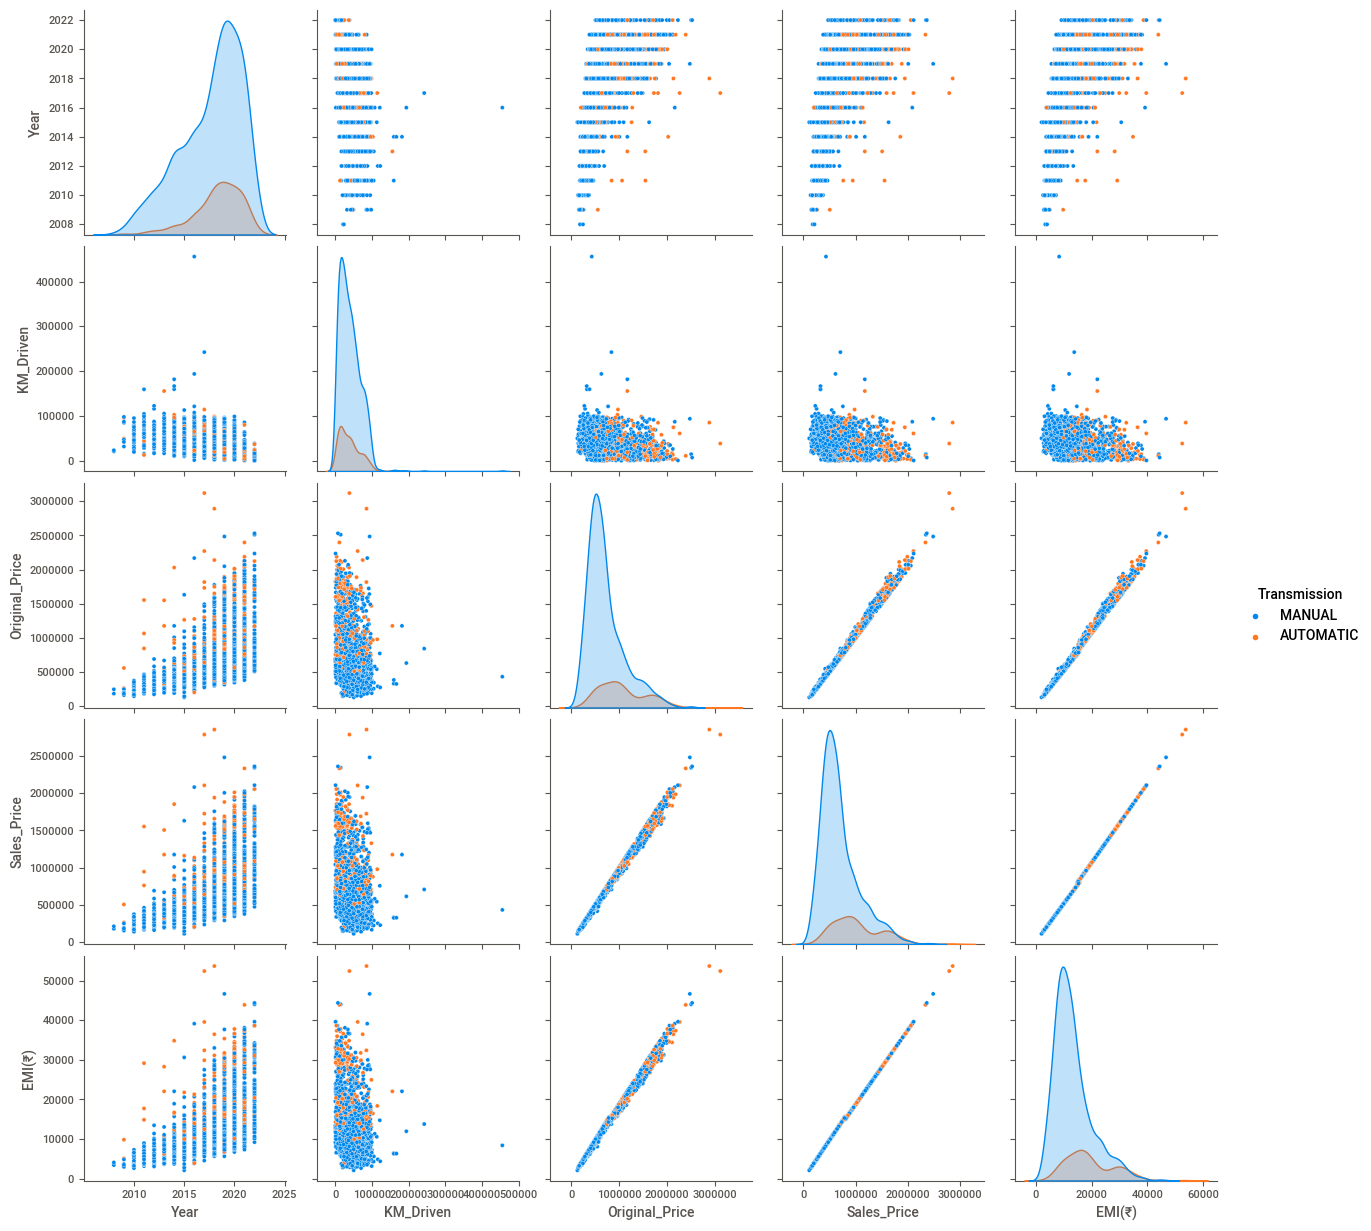

In [31]:
sns.pairplot(cars, hue='Transmission')

<AxesSubplot:>

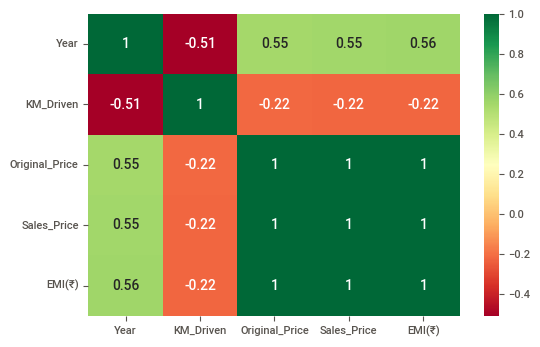

In [32]:
corrmat = cars.corr()
top_corr_features = corrmat.index
sns.heatmap(cars[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Checking relationship of Company with Sales Price

In [33]:
cars['Company'].unique()

array(['Maruti', 'Hyundai', 'Mahindra', 'Skoda', 'Volkswagen', 'Ford',
       'Tata', 'Renault', 'Toyota', 'MG', 'Honda', 'Nissan', 'KIA',
       'Jeep', 'SKODA', 'Jaguar', 'Datsun', 'MARUTI', 'Mercedes', 'Fiat',
       'Chevrolet'], dtype=object)

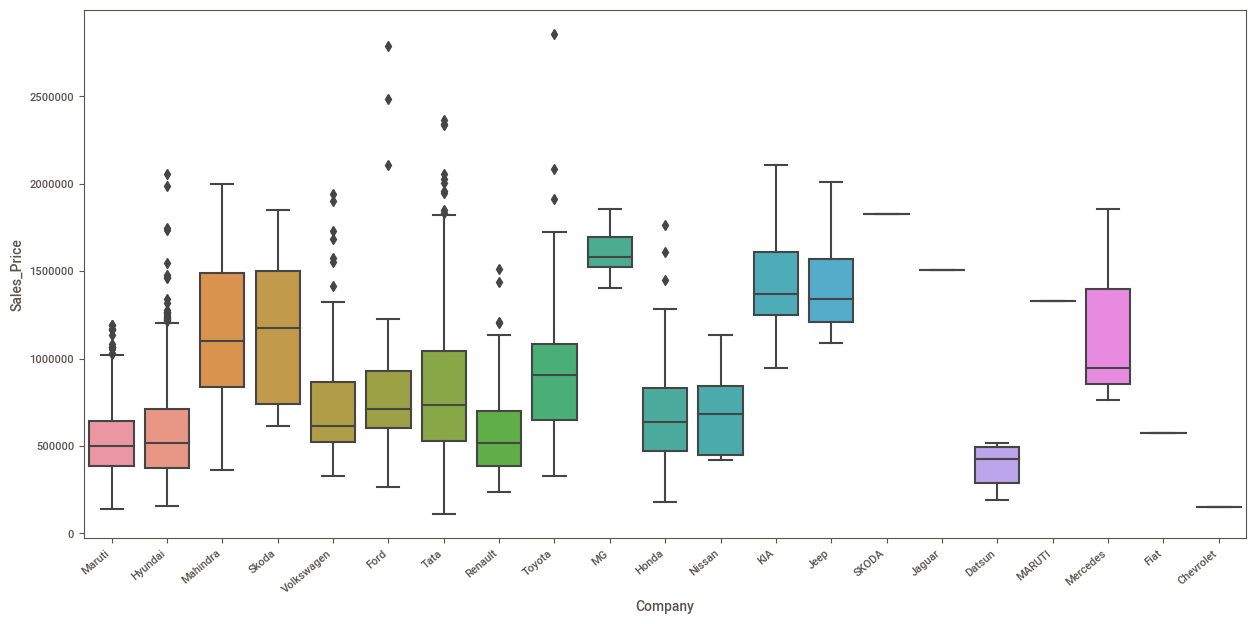

In [34]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Company',y='Sales_Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Sales Price

In [35]:
import warnings
warnings.filterwarnings('ignore')

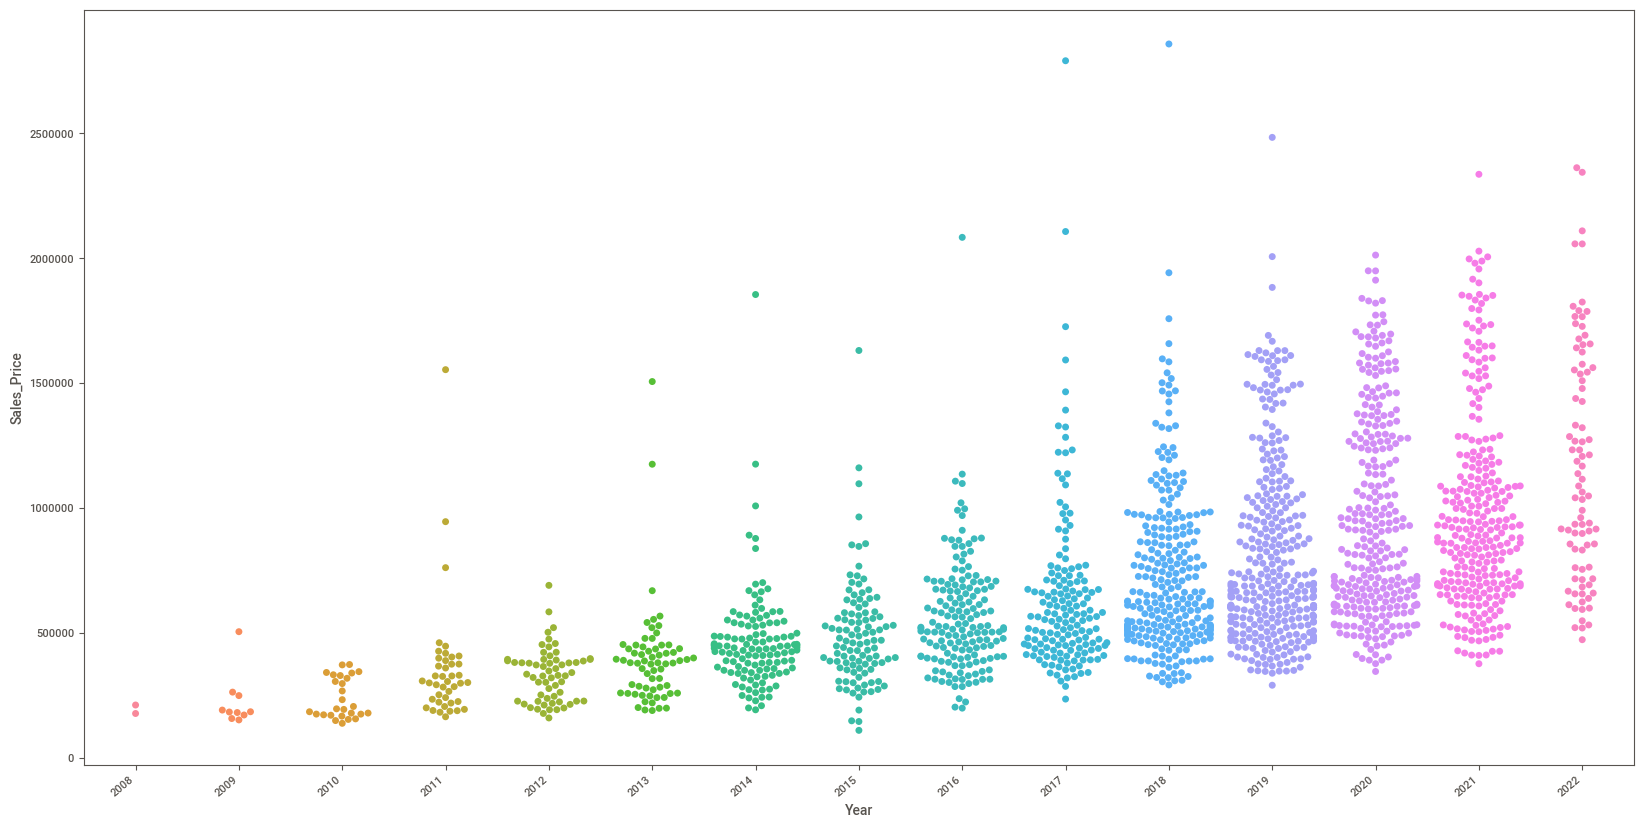

In [36]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Sales_Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of KM_Driven with Sales Price

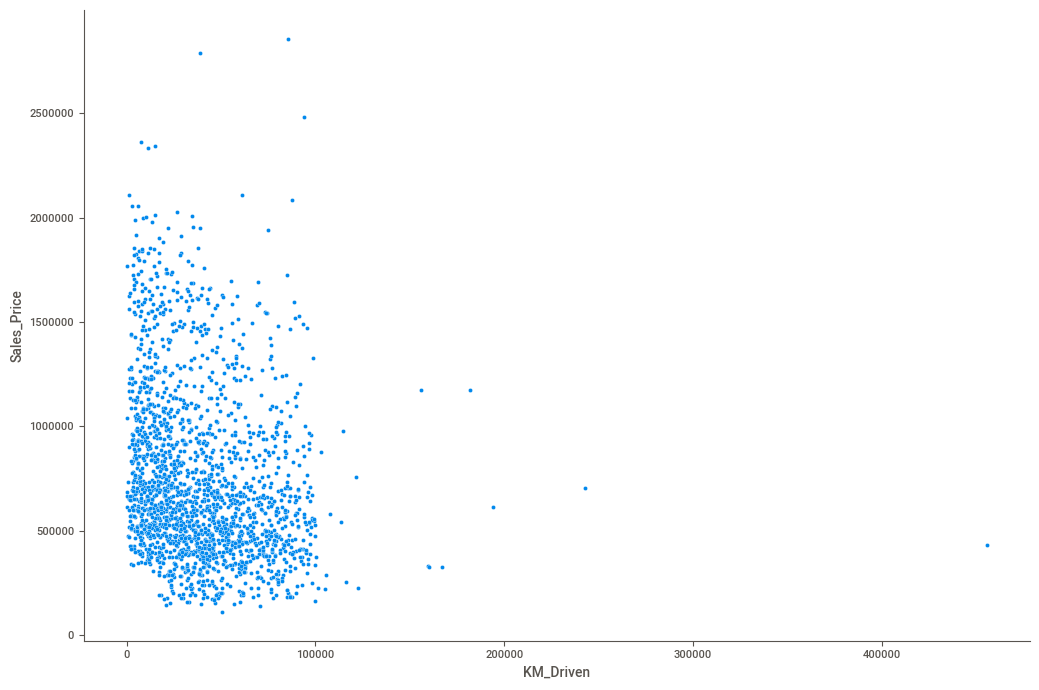

In [37]:
sns.relplot(x='KM_Driven',y='Sales_Price',data=cars,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Sales Price

<AxesSubplot:xlabel='Fuel_Type', ylabel='Sales_Price'>

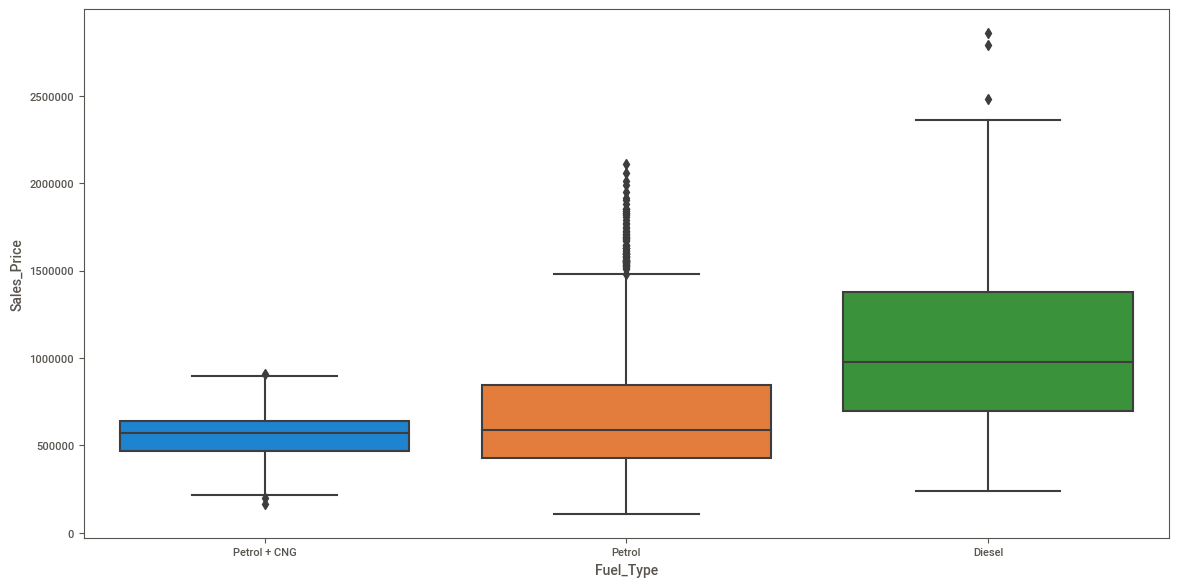

In [38]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Sales_Price',data=cars)

### Relationship of Sales Price with FuelType, Year and Company mixed

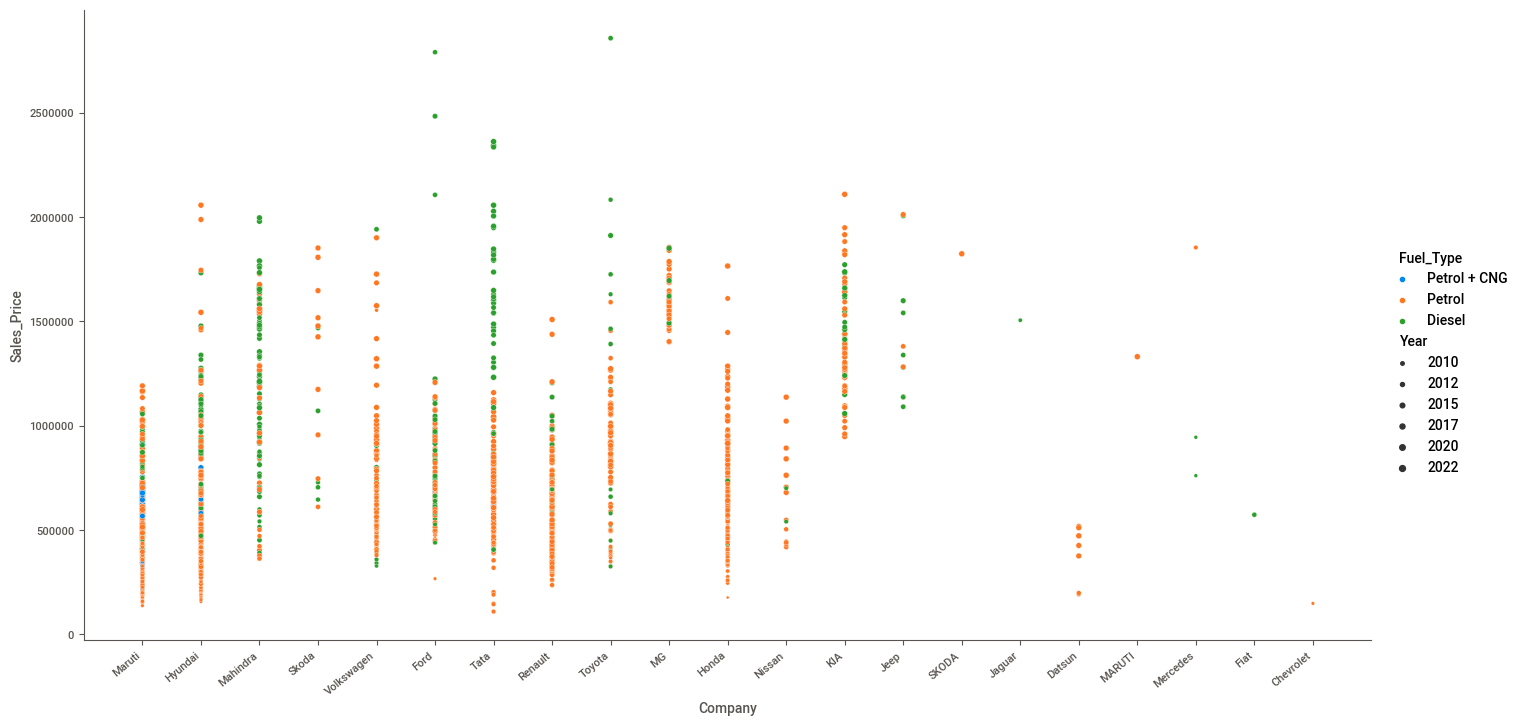

In [39]:
ax=sns.relplot(x='Company',y='Sales_Price',data=cars,hue='Fuel_Type',size='Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Checking relationship of EMI with Sales Price for hue as Company

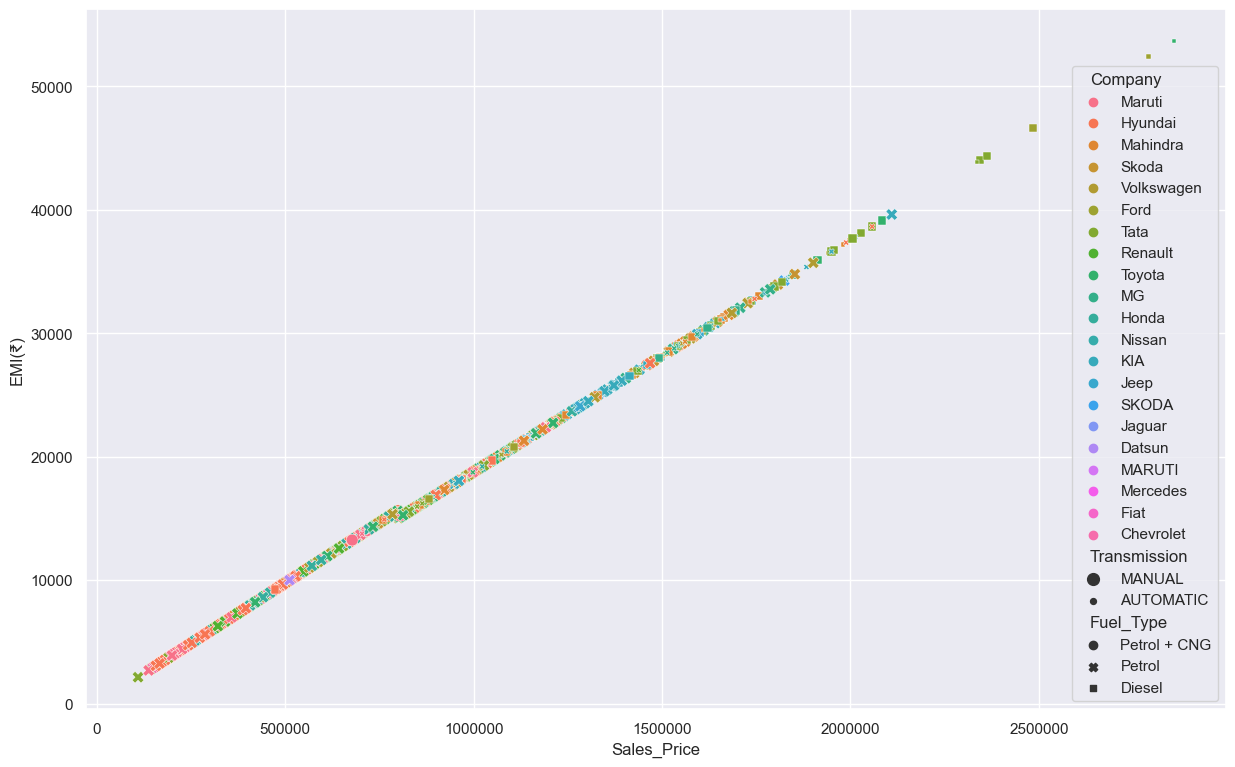

In [47]:
sns.scatterplot (x= "Sales_Price" , y = "EMI(₹)" , hue = "Company" , style = "Fuel_Type" , size = "Transmission" , data = cars   )
sns.set(rc= {'figure.figsize' :(14.7 , 9.27)})

In [41]:
#!pip install pywedge

In [42]:
import pywedge as pw

In [43]:
mc=pw.Pywedge_Charts(cars,c=None,y='Sales_Price')

In [44]:
charts=mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')